Kontúr

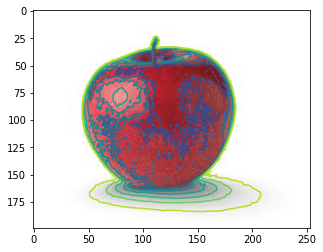

In [7]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pylab as plt
url="https://media.geeksforgeeks.org/wp-content/uploads/20210201174538/gfg.jpeg"
image_apple=io.imread(url)
plt.imshow(image_apple)
image_apple_g=cv.cvtColor(image_apple,cv.COLOR_BGR2GRAY)
plt.contour(image_apple_g)

Küszöbölés

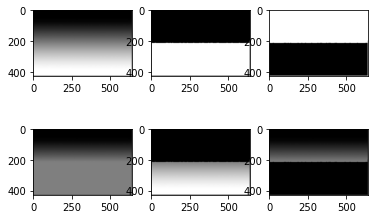

127.0


In [9]:
url="https://pe-images.s3.amazonaws.com/basics/cc/gradients/essentials/vertical-black-to-white-gradient.jpg"
grad=io.imread(url)
ret, thresh1=cv.threshold(grad, 127,255,cv.THRESH_BINARY)
ret, thresh2=cv.threshold(grad, 127,255,cv.THRESH_BINARY_INV)
ret, thresh3=cv.threshold(grad, 127,255,cv.THRESH_TRUNC)
ret, thresh4=cv.threshold(grad, 127,255,cv.THRESH_TOZERO)
ret, thresh5=cv.threshold(grad, 127,255,cv.THRESH_TOZERO_INV)

images=[grad, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
  plt.subplot(2,3,i+1), plt.imshow(images[i],'gray',vmin=0,vmax=255)
plt.show()
print(ret)

#https://docs.opencv.org/master/d7/d1b/group__imgproc__misc.html#ggaa9e58d2860d4afa658ef70a9b1115576a147222a96556ebc1d948b372bcd7ac59

In [10]:
!wget https://upload.wikimedia.org/wikipedia/commons/4/4b/Image_processing_pre_otsus_algorithm.jpg

--2021-05-01 12:59:22--  https://upload.wikimedia.org/wikipedia/commons/4/4b/Image_processing_pre_otsus_algorithm.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 106568 (104K) [image/jpeg]
Saving to: ‘Image_processing_pre_otsus_algorithm.jpg’

Image_processing_pr 100%[===================>] 104.07K  --.-KB/s    in 0.03s   

2021-05-01 12:59:23 (2.93 MB/s) - ‘Image_processing_pre_otsus_algorithm.jpg’ saved [106568/106568]



152.0


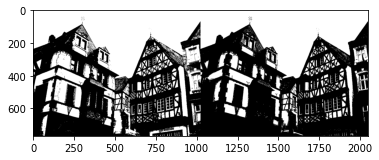

In [13]:
grad2=cv.imread('Image_processing_pre_otsus_algorithm.jpg',0)
ret,tr1=cv.threshold(grad2,127,255,cv.THRESH_BINARY)
ret,tr2=cv.threshold(grad2,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
res=np.hstack((tr1,tr2))
plt.imshow(res,cmap='gray')
print(ret)

In [14]:
!wget https://datacarpentry.org/image-processing/fig/06-junk-before.jpg

--2021-05-01 13:13:07--  https://datacarpentry.org/image-processing/fig/06-junk-before.jpg
Resolving datacarpentry.org (datacarpentry.org)... 185.199.110.153, 185.199.109.153, 185.199.111.153, ...
Connecting to datacarpentry.org (datacarpentry.org)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47400 (46K) [image/jpeg]
Saving to: ‘06-junk-before.jpg’

06-junk-before.jpg  100%[===================>]  46.29K  --.-KB/s    in 0.01s   

2021-05-01 13:13:07 (3.89 MB/s) - ‘06-junk-before.jpg’ saved [47400/47400]



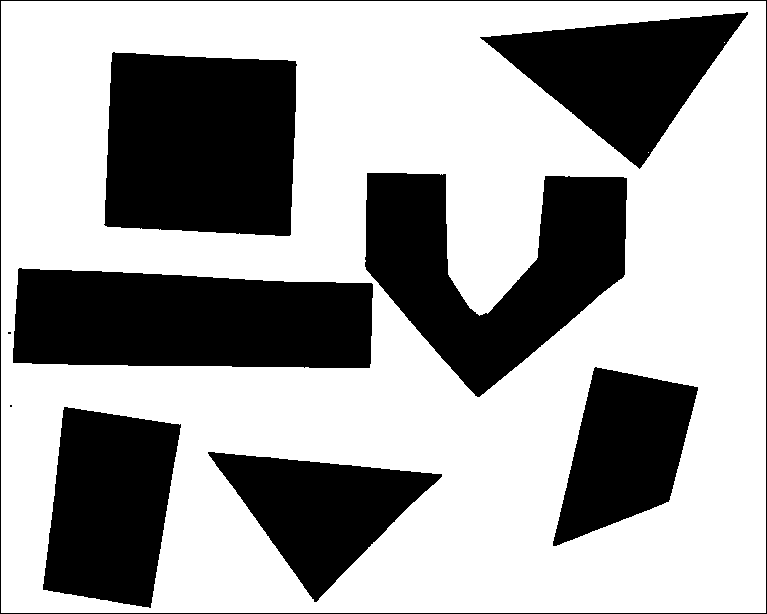

In [17]:
tr_tut=cv.imread('06-junk-before.jpg',0)
ret, tr1_tut=cv.threshold(tr_tut,217,255,cv.THRESH_BINARY)
cv2_imshow(tr1_tut)

Mean

Gaussian

In [18]:
! wget https://www.elektor.com/media/catalog/product/cache/aafde81519cbcca4c1e5516492735e5f/1/3/130549-1-v1.1_1.jpg

--2021-05-01 13:19:45--  https://www.elektor.com/media/catalog/product/cache/aafde81519cbcca4c1e5516492735e5f/1/3/130549-1-v1.1_1.jpg
Resolving www.elektor.com (www.elektor.com)... 83.96.255.227
Connecting to www.elektor.com (www.elektor.com)|83.96.255.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 130663 (128K) [image/jpeg]
Saving to: ‘130549-1-v1.1_1.jpg’

130549-1-v1.1_1.jpg 100%[===================>] 127.60K   688KB/s    in 0.2s    

2021-05-01 13:19:46 (688 KB/s) - ‘130549-1-v1.1_1.jpg’ saved [130663/130663]



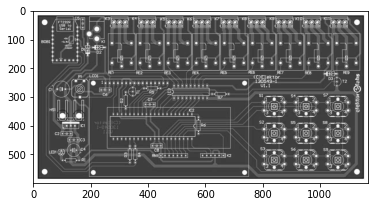

In [20]:
url="https://www.elektor.com/media/catalog/product/cache/aafde81519cbcca4c1e5516492735e5f/1/3/130549-1-v1.1_1.jpg"
img_test=io.imread(url)
img_test_g=cv.cvtColor(img_test,cv.COLOR_BGR2GRAY)
plt.imshow(img_test_g, cmap='gray')

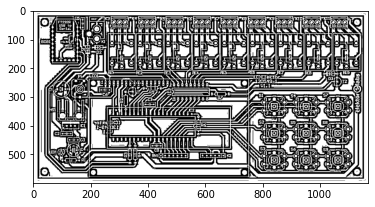

In [21]:
img_test=cv.imread('130549-1-v1.1_1.jpg',0)
img_test_mean=cv.adaptiveThreshold(img_test, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11,2)
img_test_ga=cv.adaptiveThreshold(img_test, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11,2)
plt.imshow(img_test_mean,cmap='gray')

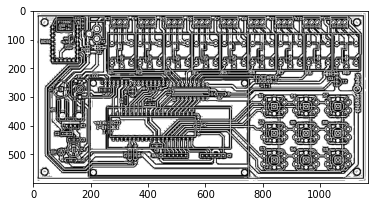

In [22]:
plt.imshow(img_test_ga,cmap='gray')

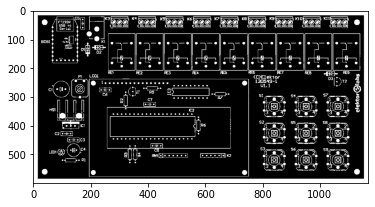

In [23]:
ret, tr1=cv.threshold(img_test,127,255,cv.THRESH_BINARY)
plt.imshow(tr1,cmap='gray')

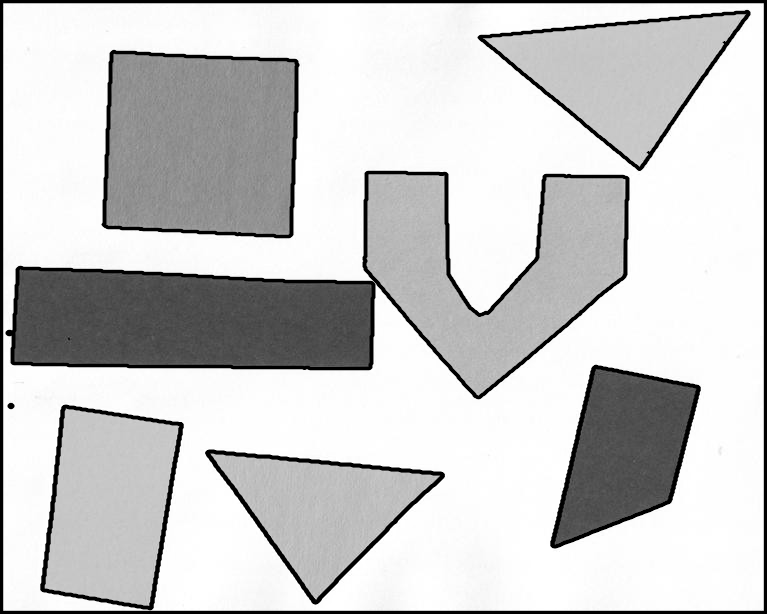

In [28]:
contours, hierarchy=cv.findContours(image=tr1_tut,mode=cv.RETR_TREE, method=cv.CHAIN_APPROX_NONE)
cv.drawContours(image=tr_tut,contours=contours,contourIdx=-1,color=(0,0,0),thickness=2, lineType=cv.LINE_AA)
cv2_imshow(tr_tut)

Konvolúció

In [ ]:
!pip install scipy

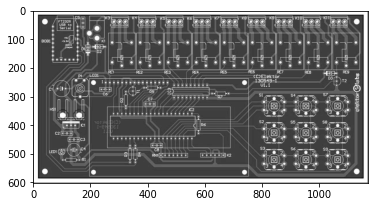

In [30]:
import scipy.signal as signal
kernel_id=np.array([[0,0,0],[0,1,0],[0,0,0]])
id=signal.convolve2d(np.asarray(img_test_g),kernel_id)
plt.imshow(id,cmap='gray')

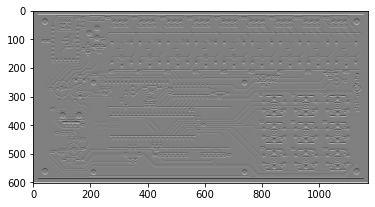

In [31]:
#élkeresés
#Prewitt operátor
#-1 -1 -1
# 0  0  0
# 1  1  1
kernel_he=np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
he=signal.convolve2d(np.asarray(img_test_g),kernel_he)
plt.imshow(he,cmap='gray')

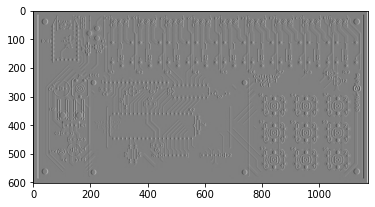

In [32]:
#-1 0 1
#-1 0 1
#-1 0 1
kernel_ve=np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
ve=signal.convolve2d(np.asarray(img_test_g),kernel_ve)
plt.imshow(ve,cmap='gray')

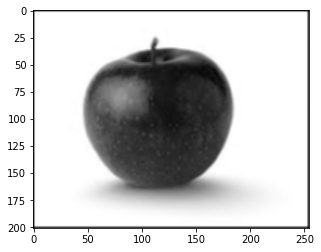

In [35]:
#elmosás/blur
kernel_mb=np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])
mb=signal.convolve2d(np.asarray(image_apple_g),kernel_mb)
plt.imshow(mb,cmap='gray')